# BANK MARKETING CAMPAIGN

# Overview

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data source.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
#check the dataframe structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [3]:
#check the number of rows and column
data.shape

(11162, 17)

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
#check the categorical feature and its unique values
for col in data.select_dtypes(include = 'object').columns:
    print(col)
    print(data[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


# Exploratory Data Analysis

## 1. Find Missing Values

In [6]:
# Step 1: Find Missing Values
missing_values = data.isnull().sum()

missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Comment:**

- There are no missing values in the dataset. All features have complete data.

## 2. Find Features with One Value

In [7]:
# Step 2: Find Features with One Value
one_value_features = data.columns[data.nunique() == 1]

one_value_features

Index([], dtype='object')

**Commment:**

- There are no features with only one unique value. This indicates that all features provide some variation in the data.

## 3. Explore the Categorical Features

In [8]:
# Step 3: Explore the Categorical Features
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes == 'O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [9]:
for feature in categorical_features:
    print('The feature is {} and number of categorical are {}'.format(feature, len(data[feature].unique())))

The feature is job and number of categorical are 12
The feature is marital and number of categorical are 3
The feature is education and number of categorical are 4
The feature is default and number of categorical are 2
The feature is housing and number of categorical are 2
The feature is loan and number of categorical are 2
The feature is contact and number of categorical are 3
The feature is month and number of categorical are 12
The feature is poutcome and number of categorical are 4


**Comment:**

- There are 9 categorical features

- Feature **job** and **month** has highest number of categorical values

## 4. Find Categorical Feature Distribution

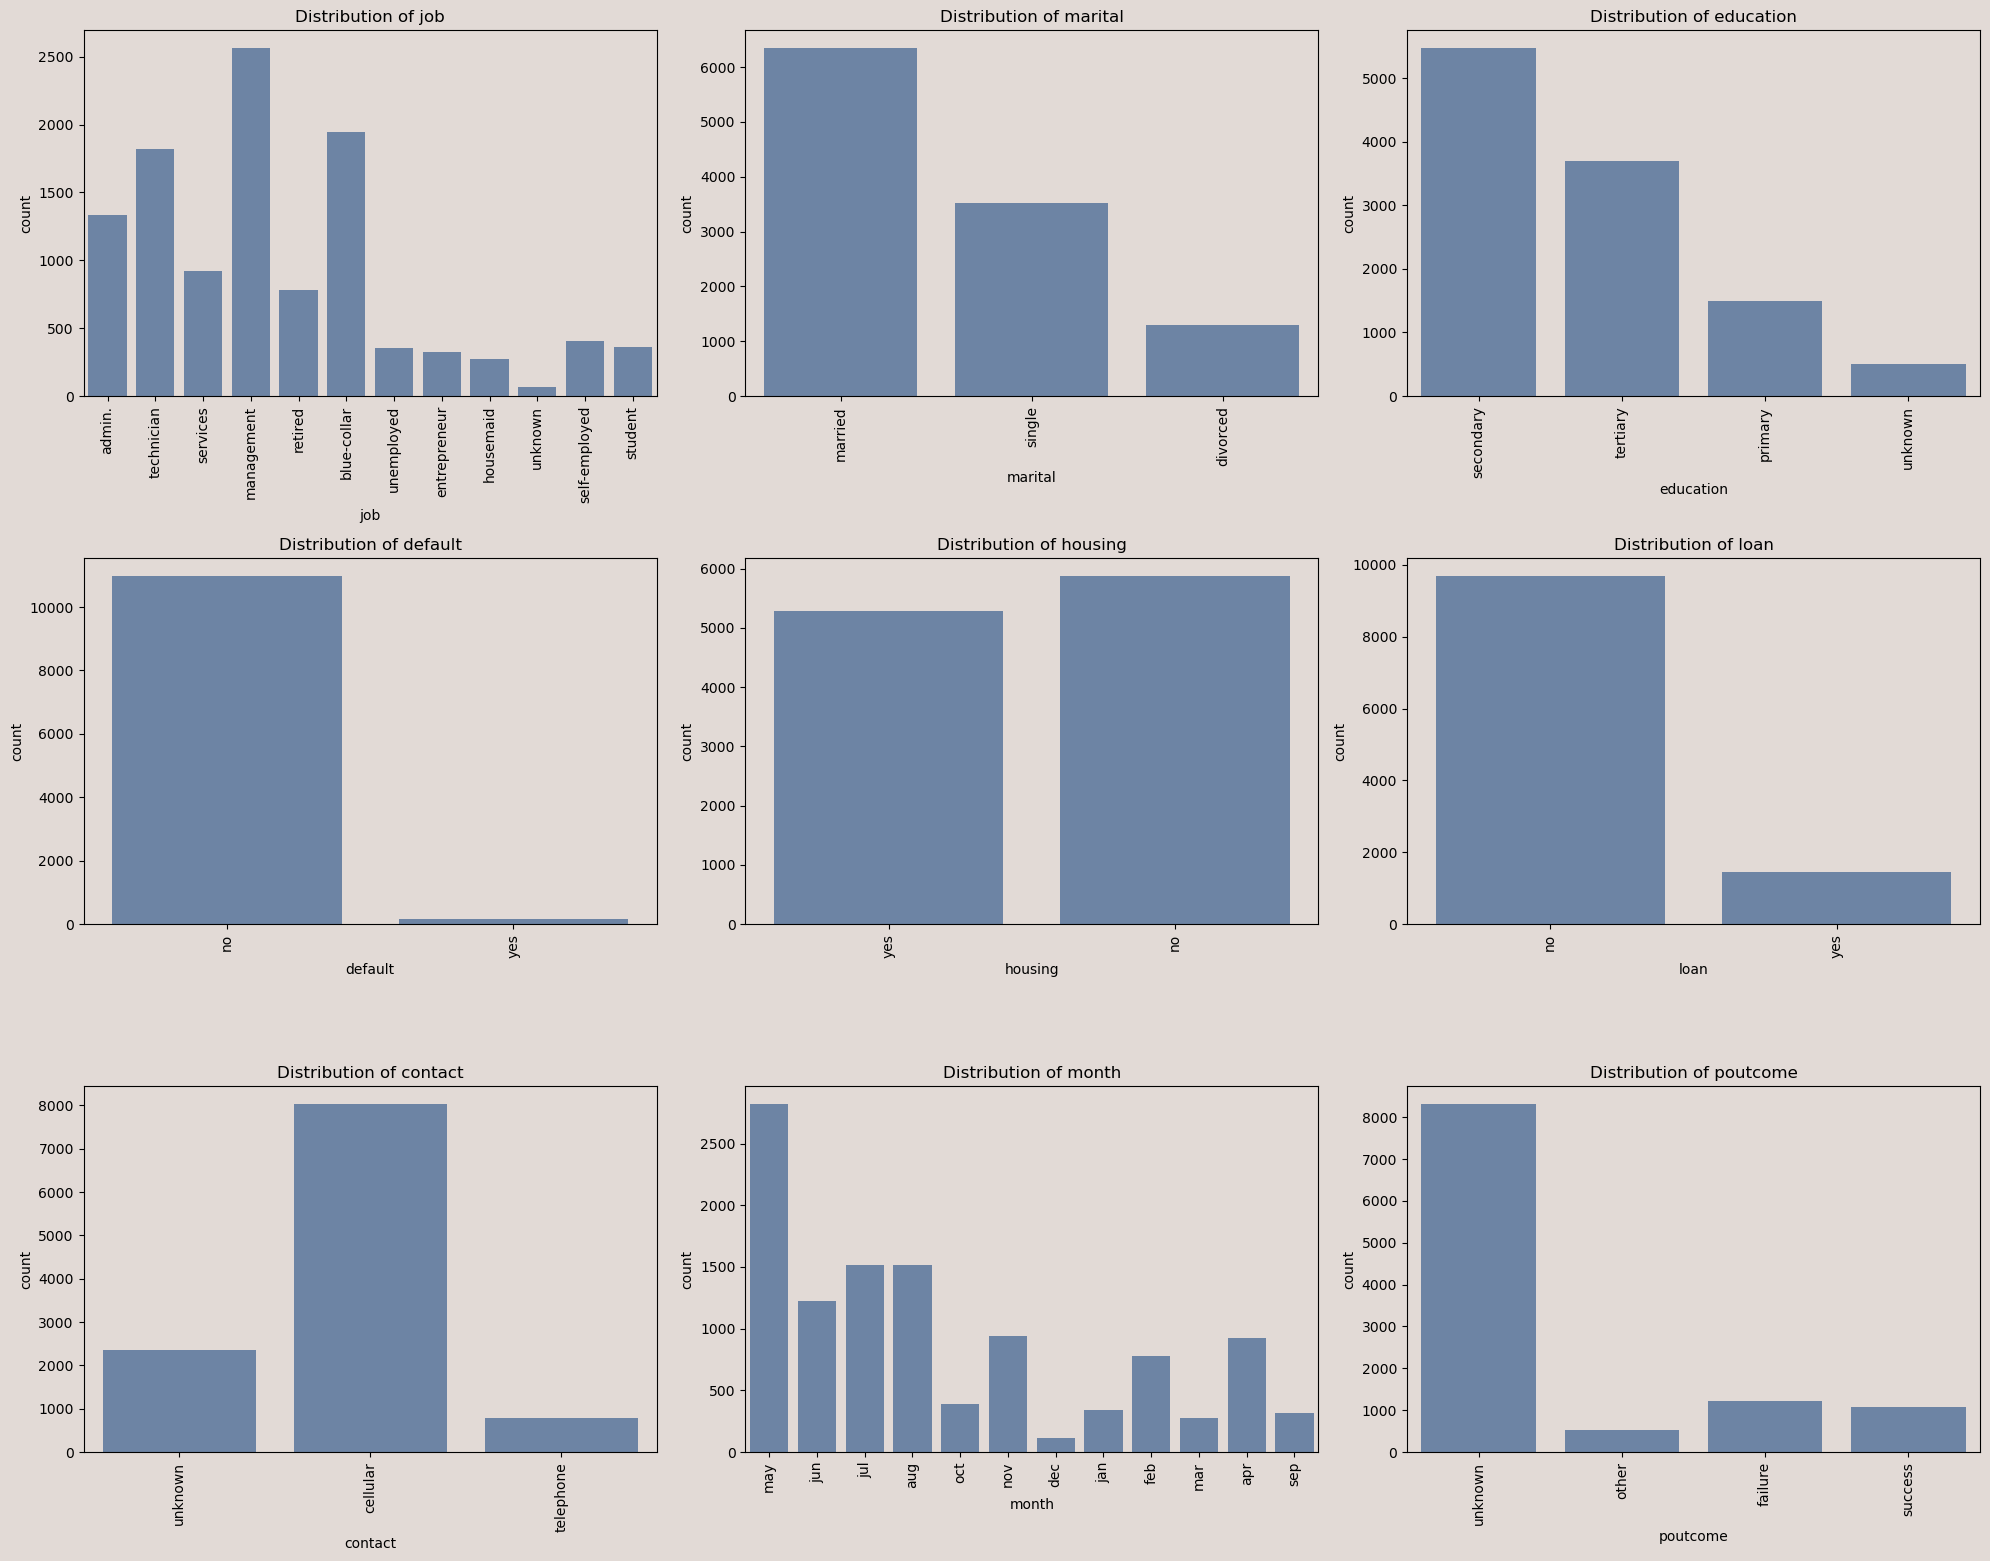

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = ["#6482AD", "#7FA1C3", "#E2DAD6", "#F5EDED"]
background_color = "#E2DAD6"

# Step 4: Find Categorical Feature Distribution
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
fig.patch.set_facecolor(background_color)

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(data=data, x=feature, ax=axes[row, col], color=palette[0])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].tick_params(axis='x', rotation=90)
    axes[row, col].set_facecolor(background_color)

# Remove any empty subplots
for j in range(i + 1, 12):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

**Commment**: 

The plots show the distribution of each categorical feature. Here are some observations:

- Most clients have jobs in "blue-collar" or "management".

- Majority of clients are "married".

- Most clients have "secondary" education.

- A large number of clients do not have credit in default.

- Many clients have housing loans.

- Most clients do not have personal loans.

- The majority of the contacts were made through cellular.

- The campaigns were heavily conducted in May.

- The outcome of the previous marketing campaign is mostly unknown.

- The target variable deposit is relatively balanced, but a more detailed check is needed.

## 5. Relationship between Categorical Features and Label

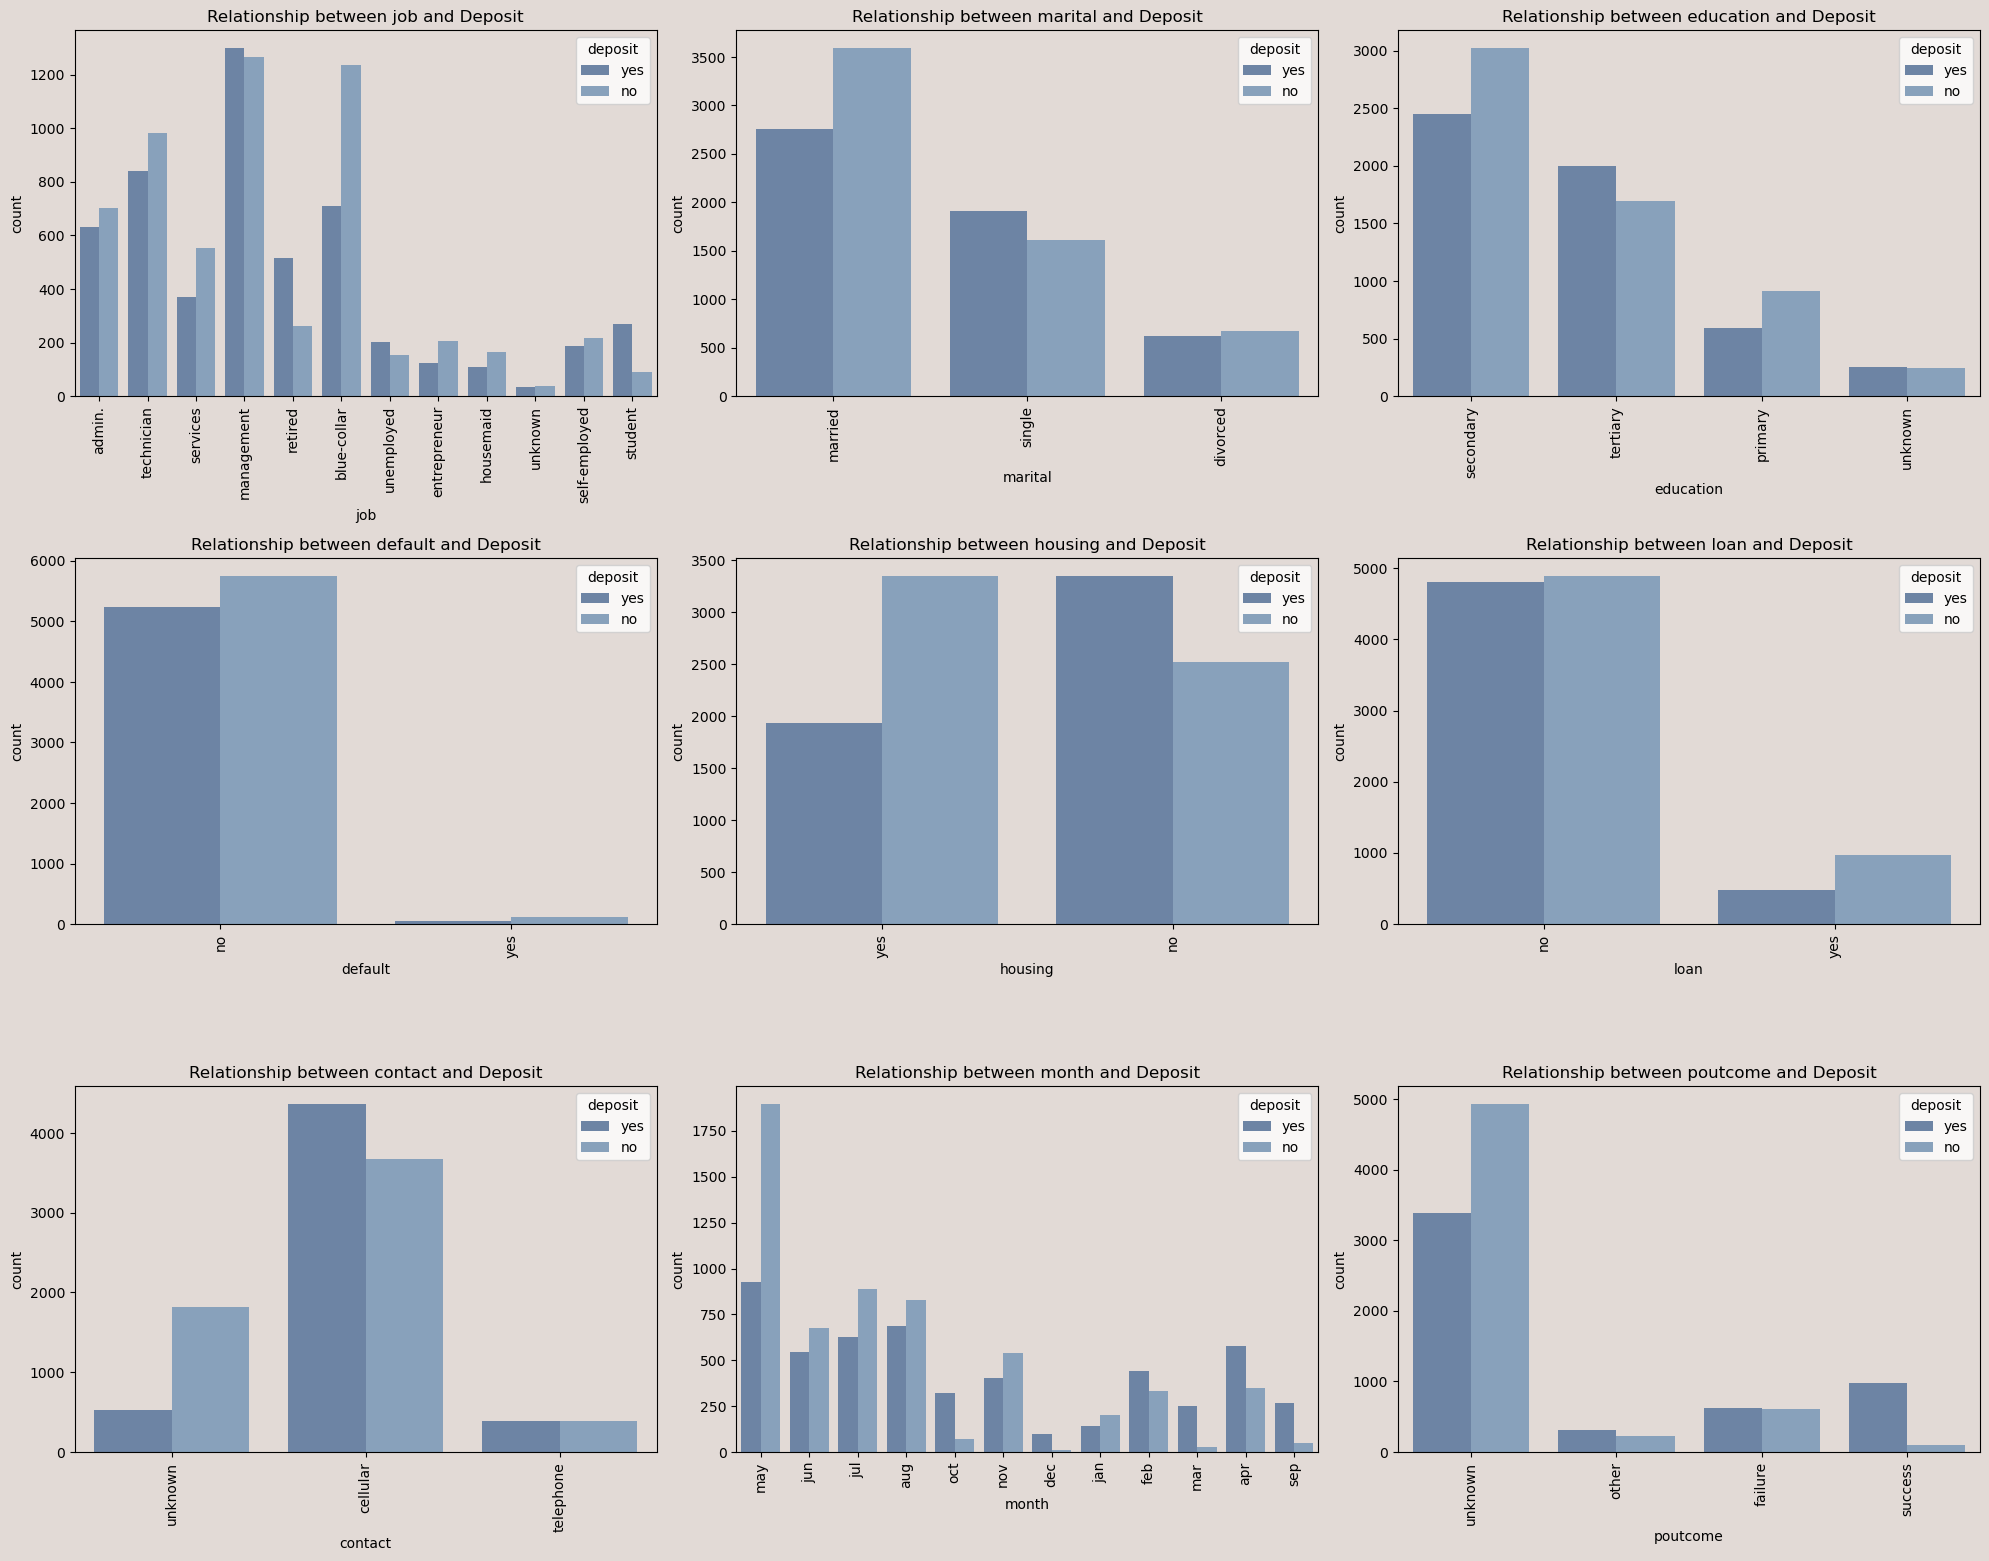

In [11]:
# Step 5: Relationship between Categorical Features and Label
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
fig.patch.set_facecolor(background_color)

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(data=data, x=feature, hue='deposit', ax=axes[row, col], palette=palette[:2])
    axes[row, col].set_title(f'Relationship between {feature} and Deposit')
    axes[row, col].tick_params(axis='x', rotation=90)
    axes[row, col].set_facecolor(background_color)

# Remove any empty subplots
for j in range(i + 1, 12):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

**Commment:**

The relationship plots provide insight into how each categorical feature relates to whether a client subscribes to a term deposit. Some notable patterns:

- Clients with jobs in "retire" or "student" are more likely to subscribe.

- Single clients seem to subscribe more than married or divorced.

- Higher education levels (tertiary) have a higher subscription rate.

- Clients with no default history are more likely to subscribe.

- Clients without a housing loan or personal loan tend to subscribe more.

- If pre campaign outcome that is poutcome = successs then, there is high chance of client to show interest in deposit

- In month of March, September, October and December, client show high interest to deposit.

- In month of May, records are high but client interst ratio is very low.

## 6. Explore the Numerical Features

In [12]:
# Step 6: Explore the Numerical Features
#list of numerical variables
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O')&(feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

#visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


**Comment:**

- There are 7 numerical features

## 7. Find Discrete Numerical Features

In [13]:
# Step 7: Find Discrete Numerical Features
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 20]

discrete_features

[]

**Comment:**

- There are no discrete numerical features identified. This means all numerical features have a relatively large number of unique values.

## 8. Find Continuous Numerical Features

In [14]:
# Step 8: Find Continuous Numerical Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

continuous_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

**Comment:**

- Since all numerical features are continuous, we'll analyze their distribution and their relationship with the target variable next

## 9. Distribution of Continuous Numerical Features

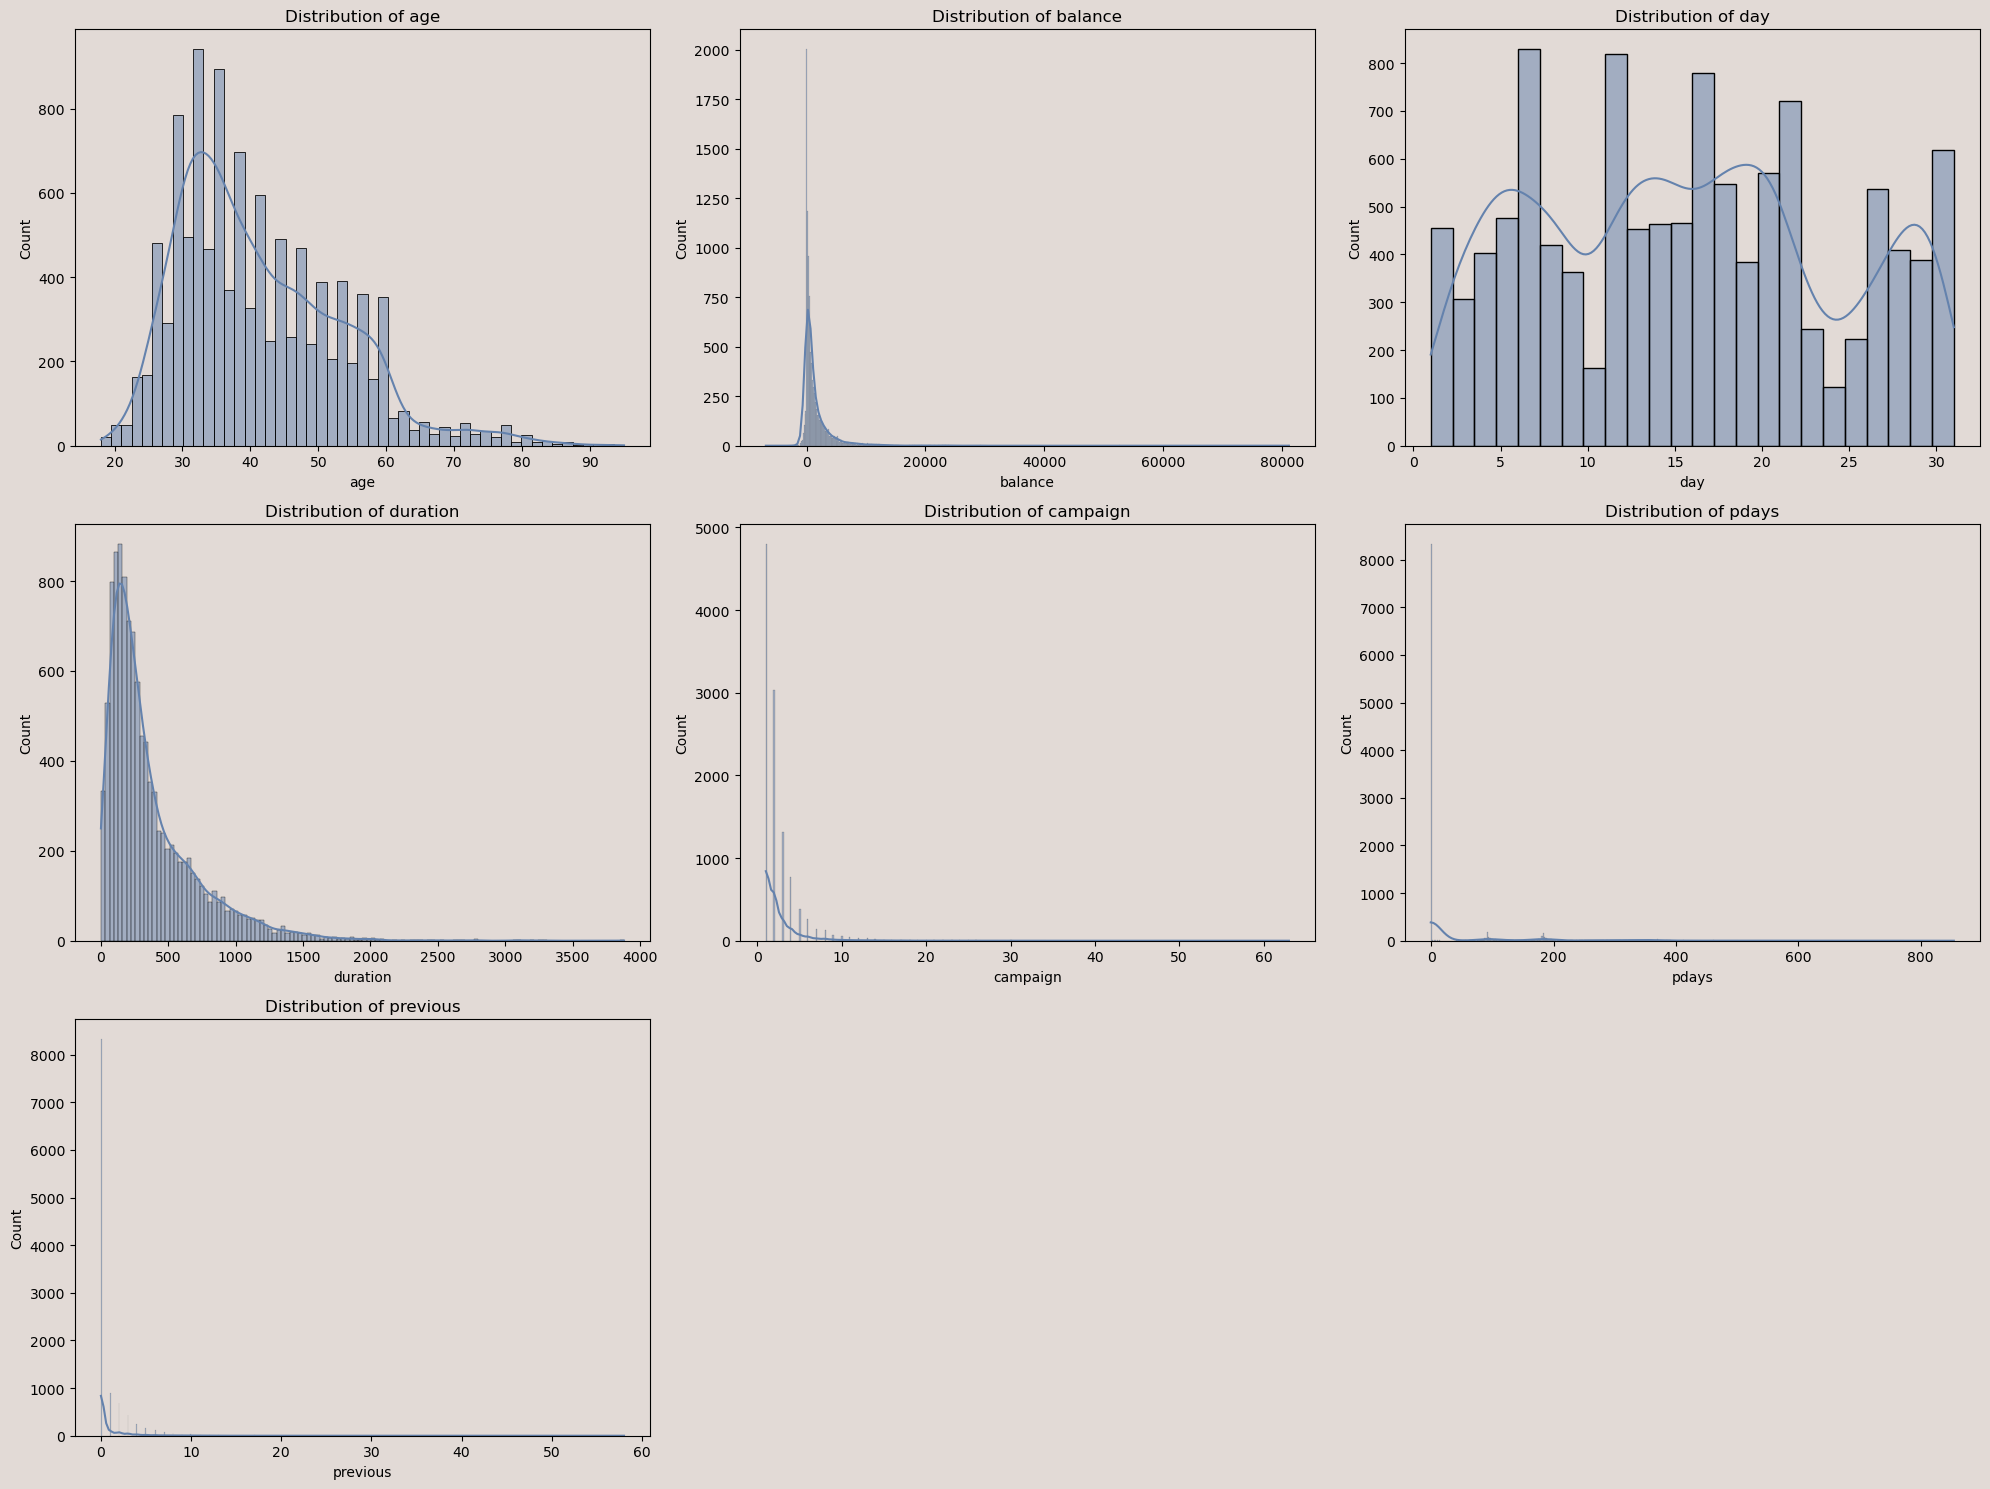

In [15]:
# Step 9: Distribution of Continuous Numerical Features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.patch.set_facecolor(background_color)

for i, feature in enumerate(continuous_features):
    row = i // 3
    col = i % 3
    sns.histplot(data[feature], kde=True, ax=axes[row, col], color=palette[0])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_facecolor(background_color)

# Remove any empty subplots
for j in range(i + 1, 9):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


**Comment:**

The distribution plots for continuous features show the following:

- **age:** Shows a right-skewed distribution with a peak around 30-40 years.

- **balance:** Highly skewed to the right, indicating most clients have a lower balance with a few having very high balances.

- **day:** Uniformly distributed, as expected for days of the month.

- **duration:** Right-skewed distribution with most calls being shorter in duration.

- **campaign:** Right-skewed, indicating most clients were contacted fewer times.

- **pdays:** Majority have a value of -1, indicating they were not previously contacted.

- **previous:** Right-skewed, indicating most clients had fewer previous contacts.

## 10. Relation between Continuous Numerical Features and Labels

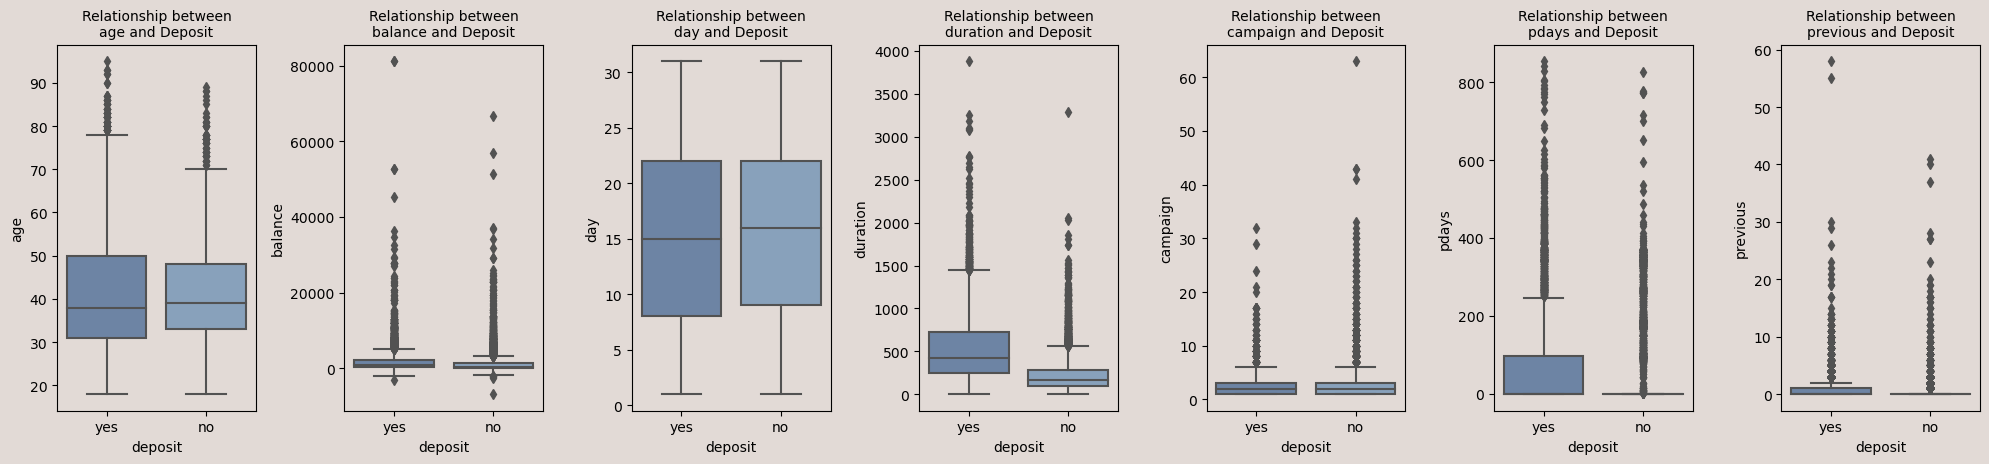

In [16]:
# Step 10: Relation between Continuous Numerical Features and Labels
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_features), figsize=(20, 5))
fig.patch.set_facecolor(background_color)

for i, feature in enumerate(continuous_features):
    sns.boxplot(data=data, x='deposit', y=feature, ax=axes[i], palette=palette[:2])
    axes[i].set_title(f'Relationship between\n{feature} and Deposit', fontsize=10)
    axes[i].set_facecolor(background_color)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Comment:**

The box plots show the relationship between continuous features and whether a term deposit was subscribed:

- **age:** Slightly younger clients are more likely to subscribe.

- **balance:** Higher balances are associated with higher subscription rates.

- **day:** No clear pattern.

- **duration:** Longer call durations correlate with higher subscription rates.

- **campaign:** Fewer campaign contacts correlate with higher subscription rates.

- **pdays:** Clients not previously contacted (pdays = -1) have higher subscription rates.

- **previous:** Fewer previous contacts correlate with higher subscription rates.

## 11. Find Outliers in Numerical Features

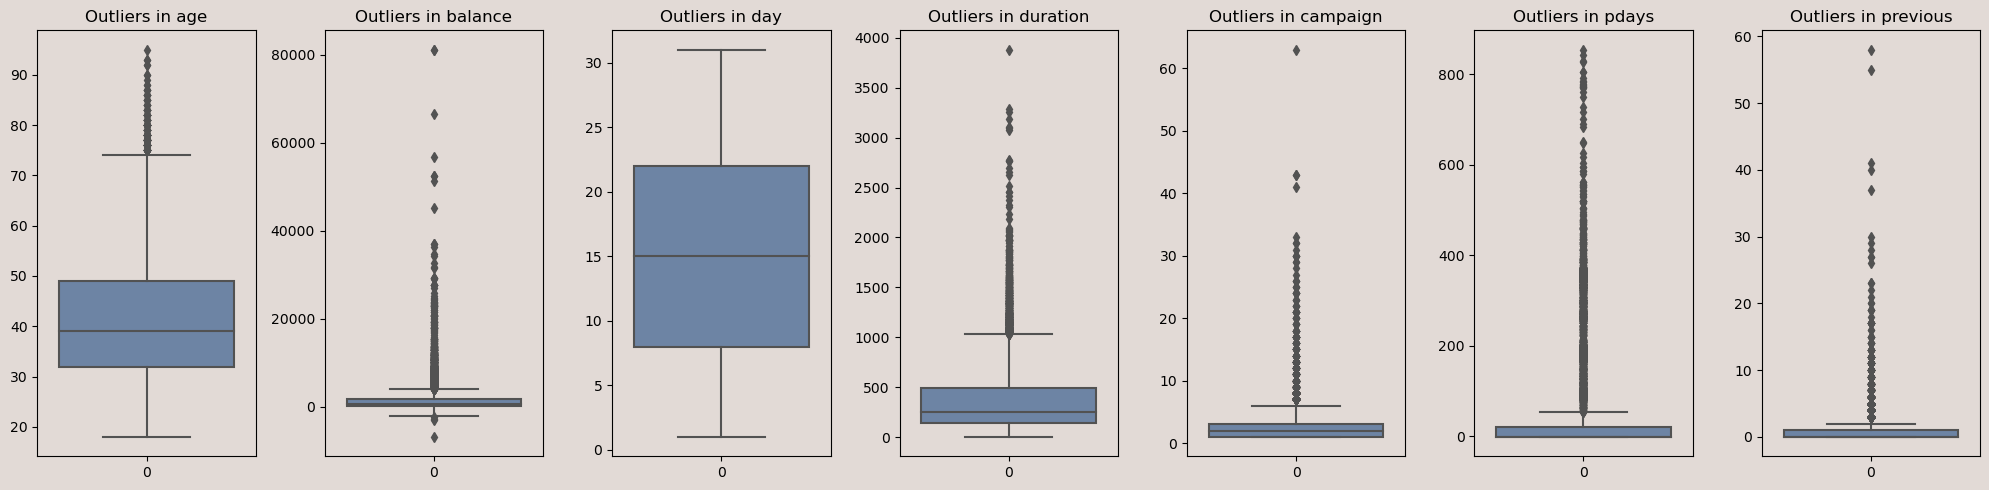

In [17]:
# Step 11: Find Outliers in Numerical Features
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(20, 5))
fig.patch.set_facecolor(background_color)

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=data[feature], ax=axes[i], color=palette[0])
    axes[i].set_title(f'Outliers in {feature}')
    axes[i].set_facecolor(background_color)

plt.tight_layout()
plt.show()

The box plots reveal the presence of outliers in several numerical features:

- **age:** A few older clients are outliers.

- **balance:** Significant outliers on the higher end.

- **day:** No significant outliers.

- **duration:** Some outliers for very long calls.

- **campaign:** Outliers for clients with a high number of contacts.

- **pdays:** Outliers present, but the majority have a value of -1.

- **previous:** Some outliers with high numbers of previous contacts.

## 12. Explore the Correlation between Numerical Features with reversed color map

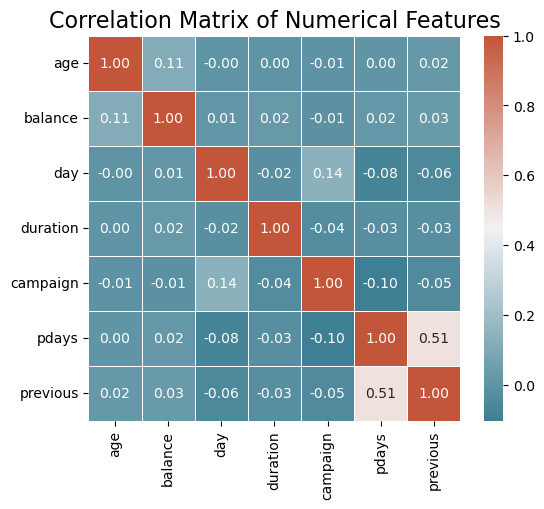

In [18]:
# Reverse the color map for the correlation matrix
reversed_palette = sns.diverging_palette(220, 20, as_cmap=True)

# Step 12: Explore the Correlation between Numerical Features with reversed color map
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap=reversed_palette, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

**Comment:**

The correlation matrix shows:

- **duration** has a positive correlation with deposit.

- **pdays** has a negative correlation with deposit.

- Other features show minimal correlation with deposit and each other.

## 13. Check if the Dataset is Balanced Based on Target Values

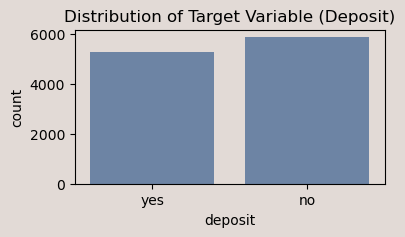

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

In [19]:
# Step 13: Check if the Dataset is Balanced Based on Target Values
fig, ax = plt.subplots(figsize=(4, 2))
fig.patch.set_facecolor(background_color)
sns.countplot(data=data, x='deposit', ax=ax, palette=[palette[0]])
ax.set_title('Distribution of Target Variable (Deposit)')
ax.set_facecolor(background_color)
plt.show()

balance_info = data['deposit'].value_counts(normalize=True)
balance_info

**Comment:**

The dataset is relatively balanced:

- **no:** 52.6%
- **yes:** 47.4%

**Summary of Findings:**

- The dataset has no missing values and no features with a single unique value.

- The categorical features show distinct distributions and relationships with the target variable.

- The numerical features show skewed distributions, with some having significant outliers.

- **duration** and **pdays** are the most correlated numerical features with the target variable.

- The dataset is relatively balanced, with a slight majority of clients not subscribing to the term deposit.

# Build a Logistic Regression model

## 1. Preprocessing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Preprocessing
# Preprocessing with the specified steps
data_preprocessed = data.copy()

In [21]:
# Drop the 'default' feature because it does not play important role
data_preprocessed.drop(columns=['default'], inplace=True)

In [22]:
# Drop the 'pdays' feature as it has -1 value for around 40%
data_preprocessed.drop(columns=['pdays'], inplace=True)

In [23]:
#remove outliers in feature age
data_preprocessed.groupby('age', sort = True)['age'].count()
#these can be ignored and values líe in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [24]:
#remove outliers in feature balance
data_preprocessed.groupby(['deposit', 'balance'], sort = True)['balance'].count()
#these outliers should not be remove as balance goes high, client show interest in deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [25]:
# Encode categorical columns
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in cat_columns:
    data_preprocessed = pd.concat([data_preprocessed.drop(col, axis=1), pd.get_dummies(data_preprocessed[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)

In [26]:
# Encode boolean columns
bool_columns = ['housing', 'loan', 'deposit']
for col in bool_columns:
    data_preprocessed[col + '_new'] = data_preprocessed[col].apply(lambda x: 1 if x == 'yes' else 0)
    data_preprocessed.drop(col, axis=1, inplace=True)

## 2. Splitting Data

In [27]:
# Separate features and target variable
X = data_preprocessed.drop(columns=['deposit_new'])
y = data_preprocessed['deposit_new']

In [28]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Model Training

In [30]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## 4. Model Evaluation

In [31]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8083296014330497

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[973, 193],
       [235, 832]], dtype=int64)

In [33]:
conf_matrix_percent = confusion_matrix(y_test, y_pred, normalize='true')
conf_matrix_percent

array([[0.83447684, 0.16552316],
       [0.22024367, 0.77975633]])

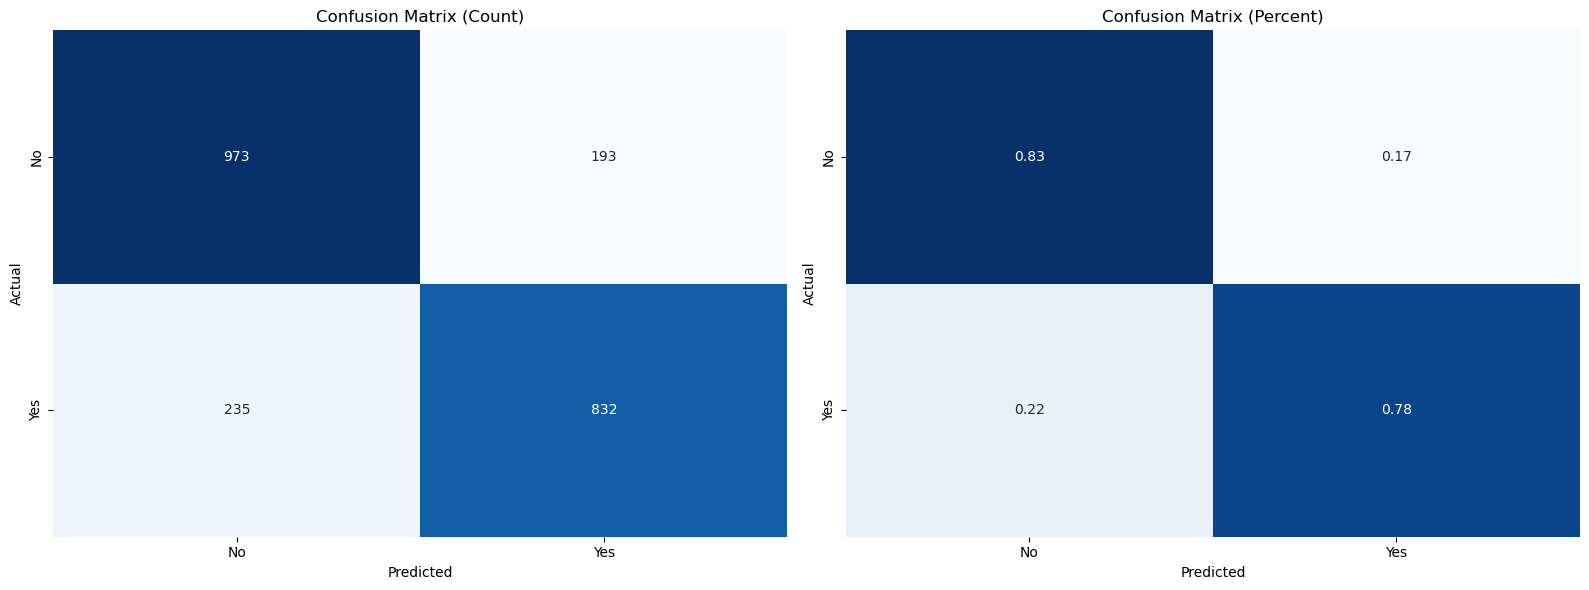

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Confusion Matrix in both counts and percentages in a single row
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Confusion Matrix (Count)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix (Count)')

# Confusion Matrix (Percent)
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False, 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix (Percent)')

plt.tight_layout()
plt.show()

In [35]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



**Insights:**

- The model achieved an overall accuracy of approximately 80.8%, which indicates good performance in predicting whether a client will subscribe to a term deposit.

- The precision and recall for both classes (no and yes) are balanced, with slightly better performance for the no class.